nr of spikes: <spikemonitor_1.count: array([17])>
spikes times: [ 0.0985  0.2146  0.3307  0.4468  0.5629  0.679   0.7951  0.9112  1.0273
  1.1434  1.2595  1.3756  1.4917  1.6078  1.7239  1.84    1.9561] s


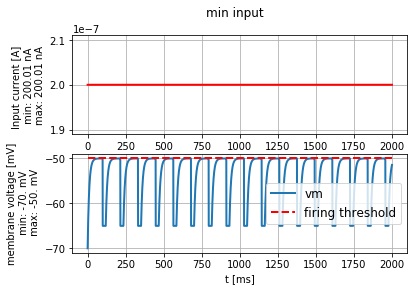

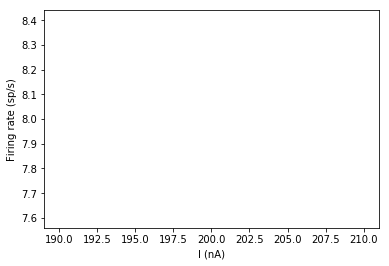

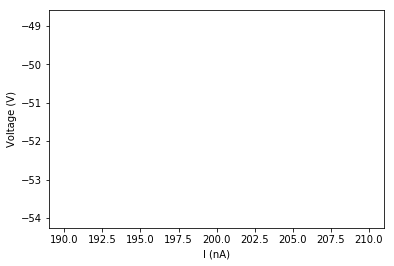

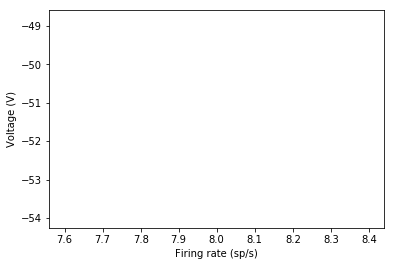

In [18]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex. tools import input_factory, plot_tools


nr of spikes: <spikemonitor_1.count: array([12])>
spikes times: [  6.8  14.8  22.8  30.8  38.8  46.8  54.8  62.8  70.8  78.8  86.8  94.8] ms


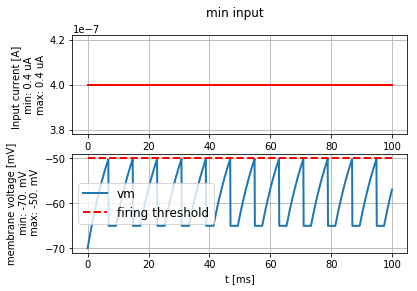

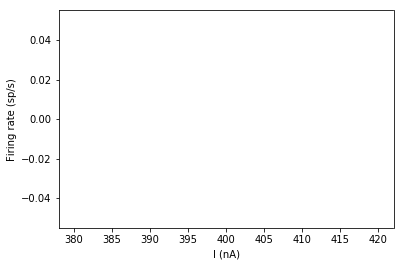

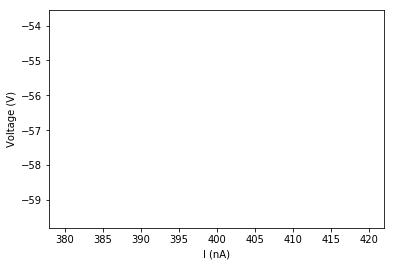

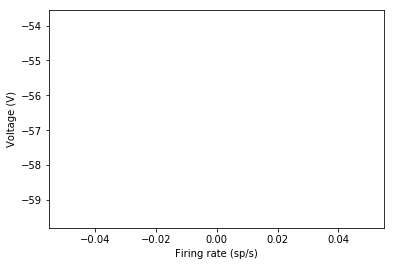

In [24]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100 * b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL
refractory_time = 2.5*b2.ms

simulation_time = 100
dt =  0.01 * b2.ms 

current = [400]
#current = np.arange(100, 600, 10)
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt (unless refractory)
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    1, model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
    refractory=refractory_time, method="euler")
neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.ms)

#plot
input_current = input_factory.get_step_current(
t_start=0, t_end=simulation_time, unit_time=b2.ms,
amplitude= current*b2.nA) 
plot_tools.plot_voltage_and_current_traces(
state_monitor, input_current, title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))
plt.plot(neuron.current /b2.pA, spike_monitor.count/simulation_time)
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.show()


WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


nr of spikes: <spikemonitor_1.count: array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72,  93,
       111, 128, 144, 159, 175, 188, 203, 217, 232, 246, 259, 273, 289,
       302, 317, 327, 344, 356, 370, 384, 399, 407, 425, 434, 454, 464,
       475, 487, 499, 512, 526, 540, 555, 571, 587, 587, 605])>
spikes times: [    4.1     4.2     4.2 ...,  1999.2  1999.3  1999.7] ms


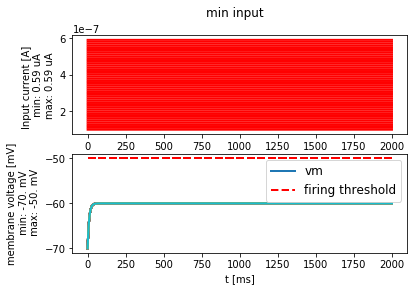

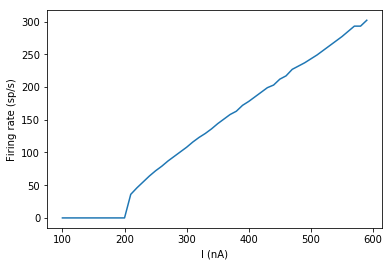

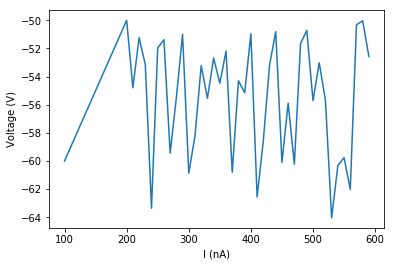

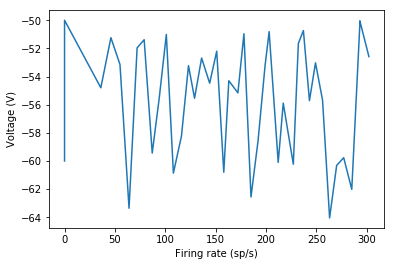

In [28]:
#Exercicio 1A
#Qual a mínima corrente aplicada necessária para que o neurônio produza disparos? 
# Calcule essa corrente usando a equação 2.11 do livro do Miller (ou equação 9 da aula 12 nas notas de aula)
# e depois simule o modelo com correntes aplicadas (i) ligeiramente menores e
# (ii) ligeiramente maiores que essa corrente mínima. Em cada caso, faça o gráfico do potencial de membrana, V(t), 
# por um intervalo de tempo de 200 ms (ou um intervalo entre disparos completo se este for mais longo). 

#Baseado na função simulate_LIF_neuron do arquivo LIF.py
"""Basic leaky integrate and fire neuron implementation.

Args:
    input_current (TimedArray): TimedArray of current amplitudes. One column per current_injection_location.
    simulation_time (Quantity): Time for which the dynamics are simulated: 5ms
    v_rest (Quantity): Resting potential: -70mV
    v_reset (Quantity): Reset voltage after spike - 65mV
    firing_threshold (Quantity) Voltage threshold for spiking -50mV
    membrane_resistance (Quantity): 10Mohm
    membrane_time_scale (Quantity): 8ms
    abs_refractory_period (Quantity): 2ms

Returns:
    StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
    SpikeMonitor: Biran2 SpikeMonitor
"""
v_rest= -70*b2.mV #EL
v_reset= -65*b2.mV #Vreset
membrane_resistance = 100 * b2.Mohm #RM
membrane_capacitance = 0.1*b2.nF #CM
firing_threshold = -50 * b2.mV #VL
refractory_time = 2.5*b2.ms

simulation_time = 2
dt =  0.01 * b2.ms 


#current = [100., 200, 200.01, 250, 300, 350, 400, 450, 500, 600]
current = np.arange(100, 600, 10)
eqs = """
dv/dt =
( ( (v_rest-v)/(membrane_capacitance * membrane_resistance) ) + (current/membrane_capacitance) ) : volt (unless refractory)
current : amp
"""
# LIF neuron using Brian2 library
neuron = b2.NeuronGroup(
    len(current), model=eqs, reset="v=v_reset", threshold="v>firing_threshold",
   # refractory=refractory_time, method="euler")
    refractory=False, method="euler")
neuron.v = v_rest  # set initial value
neuron.current = current*b2.pA

# monitoring membrane potential of neuron and injecting current
state_monitor = b2.StateMonitor(neuron, ["v"], record=True)
spike_monitor = b2.SpikeMonitor(neuron)
# run the simulation
b2.run(simulation_time*b2.second)

#plot
input_current = [None]*len(current)
for i in range(len(current)):
    input_current[i] = input_factory.get_step_current(
    t_start=0, t_end=simulation_time, unit_time=b2.second,
    amplitude= current[i]*b2.nA) 
    plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current[i], title="min input", firing_threshold=firing_threshold)

plt.figure(2)
print("nr of spikes: {}".format(spike_monitor.count))
print("spikes times: {}".format(spike_monitor.t[:]))
plt.plot(neuron.current /b2.pA, spike_monitor.count/simulation_time)
plt.xlabel('I (nA)')
plt.ylabel('Firing rate (sp/s)')
plt.show()

plt.figure(3)
plt.plot(neuron.current/b2.pA, neuron.v/b2.mV)
plt.xlabel('I (nA)')
plt.ylabel('Voltage (V)')
plt.show()

plt.figure(4)
plt.plot(spike_monitor.count/simulation_time, neuron.v/b2.mV)
plt.xlabel('Firing rate (sp/s)')
plt.ylabel('Voltage (V)')
plt.show()